In [1]:
from pandas import read_csv


In [2]:
TRAIN_DF = "../Dataset/train.csv"
tagged = dict([(p, w) for _, p, w in read_csv(TRAIN_DF).to_records()])

In [9]:
print(len(tagged))
print(tagged)

25361
{'0000e88ab.jpg': 'w_f48451c', '0001f9222.jpg': 'w_c3d896a', '00029d126.jpg': 'w_20df2c5', '00050a15a.jpg': 'new_whale', '0005c1ef8.jpg': 'new_whale', '0006e997e.jpg': 'new_whale', '000a6daec.jpg': 'w_dd88965', '000f0f2bf.jpg': 'new_whale', '0016b897a.jpg': 'w_64404ac', '001c1ac5f.jpg': 'w_a6f9d33', '001cae55b.jpg': 'w_581ba42', '001d7450c.jpg': 'new_whale', '00200e115.jpg': 'new_whale', '00245a598.jpg': 'new_whale', '002b4615d.jpg': 'new_whale', '002f99f01.jpg': 'new_whale', '00355ff28.jpg': 'w_cb622a2', '00357e37a.jpg': 'w_d3b46e7', '003795857.jpg': 'new_whale', '0041880bf.jpg': 'new_whale', '0043da555.jpg': 'new_whale', '00442c882.jpg': 'w_8cad422', '00464ff65.jpg': 'new_whale', '004775679.jpg': 'w_13ae3d4', '004ae9e26.jpg': 'new_whale', '004c0f43b.jpg': 'new_whale', '004e8ad5b.jpg': 'w_3de579a', '004f87702.jpg': 'w_1d0830e', '0050ef29d.jpg': 'w_2ba6978', '00514c876.jpg': 'w_8dddbee', '0052ce2f5.jpg': 'w_2365d55', '00537ec91.jpg': 'w_3879fa0', '00570db6b.jpg': 'w_9c506f6', '00

In [10]:
all_whale = []
w2l = []
i = 0
for p, w in tagged.items():
    if w not in all_whale and w != "new_whale":        
        all_whale.append(w)
        w2l.append((w,i))
        i += 1
w2l = dict(w2l)

In [12]:
l2ps = {}
for p, w in tagged.items():
    if w == "new_whale":
        continue
    label = w2l[w]
    if label in l2ps.keys():
        l2ps[label].append(p)
    else:
        l2ps[label]=[p]

    

In [13]:
print(len(l2ps))
print(l2ps)

5004
{0: ['0000e88ab.jpg', '0af805558.jpg', '1c351b88e.jpg', '6f7abb1be.jpg', '77a44bf94.jpg', '79c77838d.jpg', '9064d5875.jpg', '9fc84d2ae.jpg', 'c1ec12eb6.jpg', 'c64e5e861.jpg', 'c9df69a69.jpg', 'db0699767.jpg', 'e2f1b6c4a.jpg', 'e3f2dbd25.jpg'], 1: ['0001f9222.jpg', '1d6ccd05a.jpg', '2cccac55a.jpg', 'cad8eabe4.jpg'], 2: ['00029d126.jpg', '94e15dfd2.jpg', 'a6766b182.jpg', 'd5098b5a1.jpg'], 3: ['000a6daec.jpg', '01c602e06.jpg', '0706d4216.jpg', '07ac2b767.jpg', '19bb578b1.jpg', '2d4ca80ea.jpg', '2d7ede381.jpg', '46da4bda9.jpg', '5693515f6.jpg', '6d96ef90c.jpg', '749bd29f4.jpg', '779fb45f0.jpg', 'c6e055c12.jpg', 'cfa32fb80.jpg', 'fb929ab01.jpg', 'fc5c53caa.jpg'], 4: ['0016b897a.jpg', '50e0f92fa.jpg', 'c3bb9b4ca.jpg', 'd146d9d42.jpg', 'f3e3ed3f6.jpg'], 5: ['001c1ac5f.jpg', 'a0f8f6daa.jpg'], 6: ['001cae55b.jpg', '01425e516.jpg', '095533ca6.jpg', '13f275380.jpg', '1749cf8d7.jpg', '1a59c266b.jpg', '23d33bd86.jpg', '2ebeb06fb.jpg', '382d62eec.jpg', '6e74208c6.jpg', '7215b4a12.jpg', '84927ce

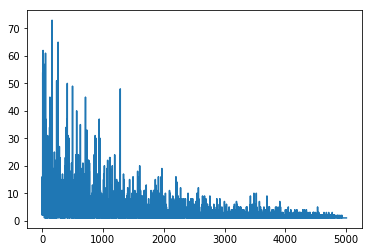

In [15]:
from matplotlib import pyplot as plt
plt.plot(l2ps.keys(), [len(ps) for ps in l2ps.values()])
plt.show()


In [25]:
count = 0
all_count = 0
for l, ps in l2ps.items():
    all_count += 1
    if len(ps)<2:
        count += 1
print(count)
print(all_count)

2073
5004


In [28]:
import os
from PIL import Image
from tqdm import tqdm_notebook
orig_path = "../Dataset/train"
for l, ps in tqdm_notebook(l2ps.items()):
    path = '../Dataset/Train/%s'%str(l)
    if not os.path.isdir(path):
        os.makedirs(path)
    for p in ps:
        img = Image.open(os.path.join(orig_path, p))
        img.save(os.path.join(path, p))

HBox(children=(IntProgress(value=0, max=5004), HTML(value='')))

In [5]:
w2l = dict(w2l)
print(len(w2l))
print(w2l)

5004
{'w_f48451c': 0, 'w_c3d896a': 1, 'w_20df2c5': 2, 'w_dd88965': 3, 'w_64404ac': 4, 'w_a6f9d33': 5, 'w_581ba42': 6, 'w_cb622a2': 7, 'w_d3b46e7': 8, 'w_8cad422': 9, 'w_13ae3d4': 10, 'w_3de579a': 11, 'w_1d0830e': 12, 'w_2ba6978': 13, 'w_8dddbee': 14, 'w_2365d55': 15, 'w_3879fa0': 16, 'w_9c506f6': 17, 'w_8a6a8d5': 18, 'w_662530e': 19, 'w_a8b34a0': 20, 'w_c0d11da': 21, 'w_50e8d58': 22, 'w_3881f28': 23, 'w_9ad3551': 24, 'w_cee684e': 25, 'w_41d24c6': 26, 'w_8a235b6': 27, 'w_2e231f4': 28, 'w_6822dbc': 29, 'w_df86a42': 30, 'w_700ebb4': 31, 'w_d892cd9': 32, 'w_7a4b2f9': 33, 'w_bc285a6': 34, 'w_c70fbcd': 35, 'w_778e474': 36, 'w_f3252ff': 37, 'w_2df85e7': 38, 'w_c7cda47': 39, 'w_62bb54b': 40, 'w_c6c89db': 41, 'w_1531bf5': 42, 'w_4e1e04d': 43, 'w_d6ca28d': 44, 'w_1260eb5': 45, 'w_fccccec': 46, 'w_acd217a': 47, 'w_5650932': 48, 'w_c98aaad': 49, 'w_dd944b7': 50, 'w_6f0cbe3': 51, 'w_6cfa650': 52, 'w_6e209a8': 53, 'w_1ea5d96': 54, 'w_914b110': 55, 'w_bf33ddf': 56, 'w_0369a5c': 57, 'w_13c9a17': 58, '

In [6]:
p2l = []
for p, w in tagged.items():
    if w != "new_whale":
        p2l.append([p,w2l[w]])
p2l = dict(p2l)
print(len(p2l))
print(p2l)

15697
{'0000e88ab.jpg': 0, '0001f9222.jpg': 1, '00029d126.jpg': 2, '000a6daec.jpg': 3, '0016b897a.jpg': 4, '001c1ac5f.jpg': 5, '001cae55b.jpg': 6, '00355ff28.jpg': 7, '00357e37a.jpg': 8, '00442c882.jpg': 9, '004775679.jpg': 10, '004e8ad5b.jpg': 11, '004f87702.jpg': 12, '0050ef29d.jpg': 13, '00514c876.jpg': 14, '0052ce2f5.jpg': 15, '00537ec91.jpg': 16, '00570db6b.jpg': 17, '006017ddf.jpg': 18, '0060f764a.jpg': 19, '006500b3d.jpg': 20, '0067b3a20.jpg': 21, '00713060e.jpg': 22, '0073118da.jpg': 23, '007a7846f.jpg': 24, '007b62e05.jpg': 25, '007f3eb46.jpg': 26, '008124524.jpg': 27, '0084fe40b.jpg': 28, '008bf89fc.jpg': 29, '008ebc50d.jpg': 30, '00910010d.jpg': 31, '0093454b6.jpg': 32, '009431af0.jpg': 33, '009589b45.jpg': 34, '00961802f.jpg': 35, '009687166.jpg': 36, '0096c8ff3.jpg': 37, '009c45bc7.jpg': 38, '00a3dd76f.jpg': 39, '00a4de95e.jpg': 40, '00a9dc47d.jpg': 41, '00b7ffb8a.jpg': 42, '00b92e9bf.jpg': 43, '00bc4dade.jpg': 44, '00c59bce9.jpg': 45, '00caa5c60.jpg': 46, '00cf9982e.jpg':

In [7]:
import random

In [8]:
ps = [p for p in p2l.keys()]
print(len(ps))
random.shuffle(ps)
ps_train = ps[:15000]
ps_valid = ps[15000:]
print(len(ps_train), len(ps_valid))
print(ps_valid)

15697
15000 697
['bbacaab9d.jpg', '2ca3c31d3.jpg', '2f0f71a7e.jpg', '63987cd12.jpg', 'ff01eff80.jpg', 'b6e5a839e.jpg', '160c93823.jpg', '92a1176bc.jpg', 'f3c755869.jpg', '7399db6cb.jpg', 'aea9f24cb.jpg', '772e2102b.jpg', 'f0f331e82.jpg', '05a967957.jpg', '16504a584.jpg', '2c444dea3.jpg', 'f8150bf44.jpg', 'e19b20d58.jpg', 'b982a76f0.jpg', '3745b5b50.jpg', '62b4b391c.jpg', '7b3642983.jpg', '0e88d825e.jpg', 'cc7b82954.jpg', '0234be323.jpg', '5353216d6.jpg', 'f0e040566.jpg', '00d43f154.jpg', '53f504f45.jpg', '3a4480216.jpg', '6bd133ac9.jpg', 'd6a8809fa.jpg', '47e17af86.jpg', 'ba5316236.jpg', '8fa189845.jpg', '60e87d35a.jpg', '0d26567b4.jpg', 'cab8c05c2.jpg', 'e9340e338.jpg', '035b5bdb8.jpg', '1c1a6c7ec.jpg', 'b9817de9c.jpg', 'd0cbb9511.jpg', 'cc2177654.jpg', 'a08c83d9e.jpg', 'c6c458a6b.jpg', '64a80fd6b.jpg', 'c4a0f7159.jpg', '9bd5e4093.jpg', '594eef588.jpg', 'b0cb3e058.jpg', '88094ad14.jpg', 'cfcc4f008.jpg', 'd602eb7de.jpg', 'd38987758.jpg', '52fd38dc1.jpg', 'dd09c515c.jpg', '2e9660607.jpg

In [25]:
p2l_valid = dict([p, p2l[p]] for p in ps_valid)
p2l_train = dict([p, p2l[p]] for p in ps_train)
print(len(p2l_valid))
print(p2l_valid)

697
{'2cc6dcd4d.jpg': 1787, '8794b9f17.jpg': 945, '2053da918.jpg': 1327, '6878f63a6.jpg': 2573, '18f41137a.jpg': 1130, '8db029af5.jpg': 153, '723b8a9e6.jpg': 376, '346c67649.jpg': 1851, '9c4b9547f.jpg': 648, 'b6f8c0e71.jpg': 1562, 'fda7d089f.jpg': 2671, '2fedfe3ad.jpg': 926, '9b2f01085.jpg': 3023, '6bd48019e.jpg': 3218, '7a482de13.jpg': 18, '6d96ef90c.jpg': 3, 'db8ce3f9f.jpg': 1379, 'bf0205e60.jpg': 2193, 'f63260d2c.jpg': 4923, 'c17150279.jpg': 1430, '32f751957.jpg': 528, '9d8560b5f.jpg': 4010, '07605520f.jpg': 412, '33b345d5a.jpg': 673, '4f4205526.jpg': 1053, '6e44bd0b4.jpg': 569, '55cfa30a0.jpg': 2779, '3ed6369b4.jpg': 558, '7642be67b.jpg': 3398, '71a49fb9f.jpg': 1644, 'ad2e5e991.jpg': 2575, '085f89e06.jpg': 455, '2110619d0.jpg': 1412, 'a1ace2b58.jpg': 304, '5297b6c40.jpg': 884, 'adf41c6cb.jpg': 719, '25afdfa1e.jpg': 579, '977299c3f.jpg': 443, '7adf0c561.jpg': 3415, 'a3011ef0f.jpg': 4085, '3d41a8ea2.jpg': 1825, 'b1f26f4c0.jpg': 967, '63ef236cf.jpg': 2759, '4212a3e1f.jpg': 2308, 'dbc4

In [27]:
with open("../Dataset/metadata/p2l_valid.pickle", 'wb') as f:
    pickle.dump(p2l_valid, f)

In [8]:
import pickle
with open("../Dataset/metadata/p2l.pickle", 'wb') as f:
    pickle.dump(p2l, f)

In [1]:
import pickle
with open("../Dataset/metadata/p2l.pickle", 'rb') as f:
    p2l = pickle.load(f)

In [2]:
import pandas as pd
BB_DF = "../Dataset/metadata/bounding_boxes.csv"
p2bb = pd.read_csv(BB_DF).set_index("Image")

In [6]:
from matplotlib import pyplot as plt
import numpy as np
import PIL.Image as Image
import os
from scipy.misc import imresize

/home/mulns/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


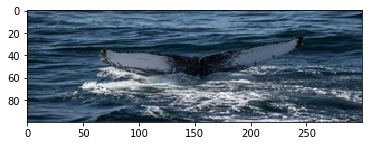

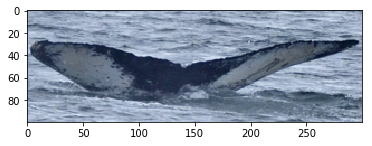

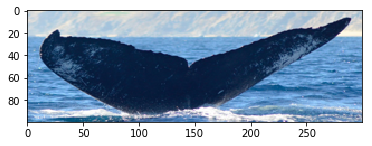

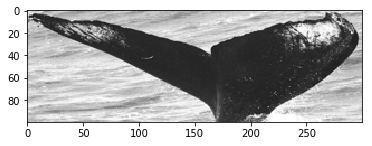

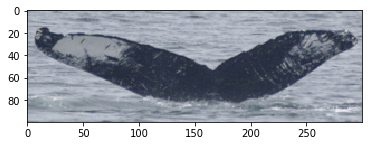

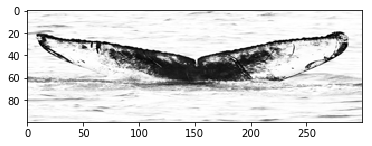

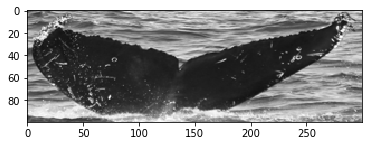

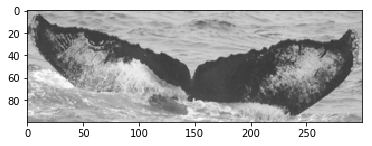

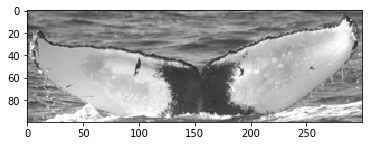

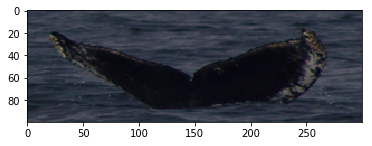

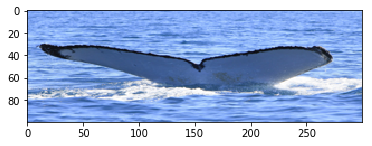

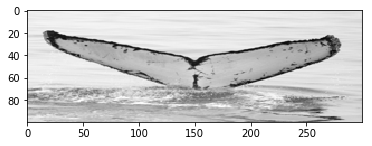

In [8]:
for i,p in enumerate(p2l.keys()):
    img = np.array(Image.open(os.path.join("../Dataset/train", p)))
    img = imresize(img, (100,300), interp="bicubic")
    plt.imshow(img.squeeze(), 'gray')
    plt.show()
    if i > 10:
        break

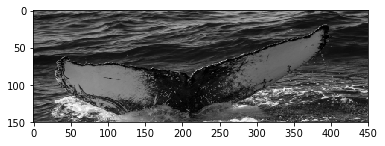

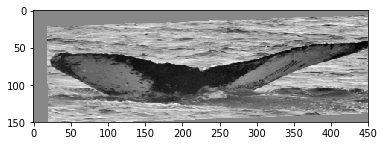

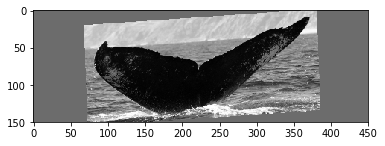

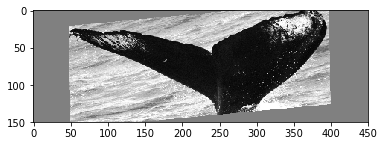

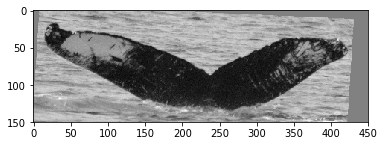

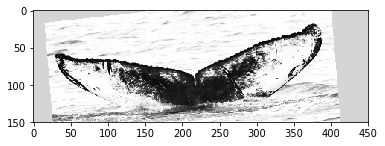

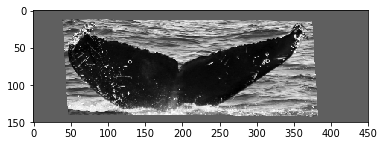

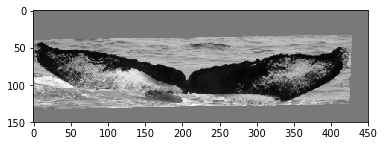

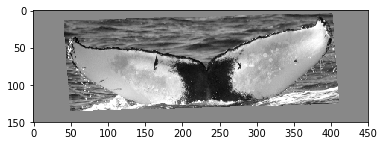

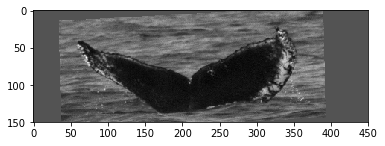

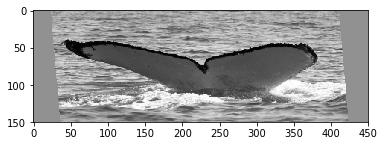

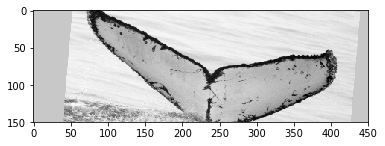

In [12]:
for i,p in enumerate(p2l.keys()):
    img = preprocess(p, p2bb, (150, 450, 1), augment=True,crop_margin=0.05, anisotropy=2.55)
    plt.imshow(img.squeeze(), 'gray')
    plt.show()
    if i > 10:
        break

In [ ]:
import numpy as np
img = np.zeros((40,40,1))
img = img.reshape(img.shape[:-1])
